In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Formula 1 World Championships and The Drivers
Data Link: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020

The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest 2021 season.
I will be exploring which drivers have had the most podium wins in the number 1 poistion as well as looking at the drivers who have also had the most podium wins in the number 1, 2, 3 position. 

My hypothesis will be that if you finish qualifying on the grid for race at either a 1, 2 or 3 position you are guaranteed a podium finish at the end of the race.  

In [2]:
results = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Asha_Sheikh_Project_3/F1_Data/results.csv')
drivers = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Asha_Sheikh_Project_3/F1_Data/drivers.csv')
status = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Asha_Sheikh_Project_3/F1_Data/status.csv')
races = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Asha_Sheikh_Project_3/F1_Data/races.csv')
constructors = pd.read_csv(
    '/Users/ashasheikh/Documents/DataBootcamp/Asha_Sheikh_Project_3/F1_Data/constructors.csv')

## Cleaning Data
### Joining all the tables and cleaning/removing not needed columns

Here I will be merging five different datasets to one in order to work with the most relevant information. The datasets will be merged using inner joins and with same key columns such as driverID. After the datasets are merged, any string null values have to be converted to NaN values using numpy, columns need to be dropped, renamed and reorganzied to create on final dataset to be exported as a csv file. 

In [3]:
# All the seperate csv dataset files are being merged into on dataframe starting with results.csv
final_f1_data = pd.merge(results, drivers, how="inner", on="driverId")
final_f1_data = pd.merge(final_f1_data, status, how="inner", on='statusId')
final_f1_data = pd.merge(final_f1_data, races, how='inner', on='raceId')
final_f1_data = pd.merge(final_f1_data,
                         constructors,
                         how='inner',
                         on='constructorId')

In [4]:
# Verifying dataset is merged and seeing the amount of data in the dataframe
final_f1_data.count()

resultId           25140
raceId             25140
driverId           25140
constructorId      25140
number_x           25140
grid               25140
position           25140
positionText       25140
positionOrder      25140
points             25140
laps               25140
time_x             25140
milliseconds       25140
fastestLap         25140
rank               25140
fastestLapTime     25140
fastestLapSpeed    25140
statusId           25140
driverRef          25140
number_y           25140
code               25140
forename           25140
surname            25140
dob                25140
nationality_x      25140
url_x              25140
status             25140
year               25140
round              25140
circuitId          25140
name_x             25140
date               25140
time_y             25140
url_y              25140
constructorRef     25140
name_y             25140
nationality_y      25140
url                25140
dtype: int64

In [5]:
# In the datasets, if drivers did not finish a race their time was not recorded there were nulls values for any
# times and for older data before the year 2000 due to inablility to accuratly record time
final_f1_data.replace('\\N', np.nan, inplace=True)
final_f1_data.count()

resultId           25140
raceId             25140
driverId           25140
constructorId      25140
number_x           25134
grid               25140
position           14389
positionText       25140
positionOrder      25140
points             25140
laps               25140
time_x              6681
milliseconds        6680
fastestLap          6724
rank                6891
fastestLapTime      6724
fastestLapSpeed     6724
statusId           25140
driverRef          25140
number_y            4883
code                8559
forename           25140
surname            25140
dob                25140
nationality_x      25140
url_x              25140
status             25140
year               25140
round              25140
circuitId          25140
name_x             25140
date               25140
time_y              6671
url_y              25140
constructorRef     25140
name_y             25140
nationality_y      25140
url                25140
dtype: int64

In [6]:
# Confriming the amout of null values
final_f1_data.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number_x               6
grid                   0
position           10751
positionText           0
positionOrder          0
points                 0
laps                   0
time_x             18459
milliseconds       18460
fastestLap         18416
rank               18249
fastestLapTime     18416
fastestLapSpeed    18416
statusId               0
driverRef              0
number_y           20257
code               16581
forename               0
surname                0
dob                    0
nationality_x          0
url_x                  0
status                 0
year                   0
round                  0
circuitId              0
name_x                 0
date                   0
time_y             18469
url_y                  0
constructorRef         0
name_y                 0
nationality_y          0
url                    0
dtype: int64

In [7]:
# Dropping the unnecessary columns from the dataframe
final_f1_data = final_f1_data.drop([
    'raceId', 'constructorId', 'position', 'positionText', 'laps', 'time_x',
    'milliseconds', 'fastestLap', 'rank', 'fastestLapSpeed', 'statusId',
    'forename', 'dob', 'nationality_x', 'url_x', 'round', 'circuitId',
    'time_y', 'url_y', 'constructorRef', 'nationality_y', 'url', 'number_x',
    'number_y', 'date', 'points'
],
                                   axis=1)

In [8]:
final_f1_data

,resultId,driverId,grid,positionOrder,fastestLapTime,driverRef,code,surname,status,year,name_x,name_y
0,1,1,1,1,1:27.452,hamilton,HAM,Hamilton,Finished,2008,Australian Grand Prix,McLaren
1,5,5,3,5,1:27.418,kovalainen,KOV,Kovalainen,Finished,2008,Australian Grand Prix,McLaren
2,27,1,9,5,1:35.462,hamilton,HAM,Hamilton,Finished,2008,Malaysian Grand Prix,McLaren
3,25,5,8,3,1:35.922,kovalainen,KOV,Kovalainen,Finished,2008,Malaysian Grand Prix,McLaren
4,69,1,5,3,1:22.017,hamilton,HAM,Hamilton,Finished,2008,Spanish Grand Prix,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...
25135,19712,663,7,19,NaN,wharton,NaN,Wharton,Spun off,1952,Belgian Grand Prix,Frazer Nash
25136,19807,663,7,10,NaN,wharton,NaN,Wharton,Wheel bearing,1952,Dutch Grand Prix,Frazer Nash
25137,19643,663,13,4,NaN,wharton,NaN,Wharton,+2 Laps,1952,Swiss Grand Prix,Frazer Nash
25138,19756,705,25,21,NaN,crook,NaN,Crook,+10 Laps,1952,British Grand Prix,Frazer Nash


In [9]:
# Renaming columns for clarity and as well as reorganizing the columns to be more organized and cohesive
final_f1_data.rename(columns={
    'grid': 'gridStart',
    'name_x': 'circuitName',
    'name_y': 'constructorName',
    'positionOrder': 'podiumFinish'
},
                     inplace=True)
final_f1_data[[
    'resultId', 'driverId', 'surname', 'driverRef', 'code', 'year',
    'constructorName', 'gridStart', 'podiumFinish', 'fastestLapTime',
    'circuitName'
]]

,resultId,driverId,surname,driverRef,code,year,constructorName,gridStart,podiumFinish,fastestLapTime,circuitName
0,1,1,Hamilton,hamilton,HAM,2008,McLaren,1,1,1:27.452,Australian Grand Prix
1,5,5,Kovalainen,kovalainen,KOV,2008,McLaren,3,5,1:27.418,Australian Grand Prix
2,27,1,Hamilton,hamilton,HAM,2008,McLaren,9,5,1:35.462,Malaysian Grand Prix
3,25,5,Kovalainen,kovalainen,KOV,2008,McLaren,8,3,1:35.922,Malaysian Grand Prix
4,69,1,Hamilton,hamilton,HAM,2008,McLaren,5,3,1:22.017,Spanish Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...
25135,19712,663,Wharton,wharton,NaN,1952,Frazer Nash,7,19,NaN,Belgian Grand Prix
25136,19807,663,Wharton,wharton,NaN,1952,Frazer Nash,7,10,NaN,Dutch Grand Prix
25137,19643,663,Wharton,wharton,NaN,1952,Frazer Nash,13,4,NaN,Swiss Grand Prix
25138,19756,705,Crook,crook,NaN,1952,Frazer Nash,25,21,NaN,British Grand Prix


In [10]:
# Confirm that the data types are correct for columns 
final_f1_data.dtypes

resultId            int64
driverId            int64
gridStart           int64
podiumFinish        int64
fastestLapTime     object
driverRef          object
code               object
surname            object
status             object
year                int64
circuitName        object
constructorName    object
dtype: object

In [11]:
final_f1_data.to_csv("final_f1_data.csv")

## Exploring Data 

In [12]:
#Taking one drivers wins that fnished in position 1, 2, 3
podium_finish = final_f1_data[final_f1_data['podiumFinish'] <= 3]

In [13]:
#Keeping on the top 10 drivers and counting how many have podium positions retrived in their career
top_10_drivers = podium_finish.groupby('driverRef').size().sort_values(
    ascending=False).to_frame().head(10)

In [14]:
#renaming column 
top_10_drivers.columns = ['Podium wins']

In [15]:
top_10_drivers

,Podium wins
driverRef,
hamilton,171
michael_schumacher,155
vettel,122
prost,106
raikkonen,103
alonso,97
senna,80
barrichello,68
coulthard,62


Text(0.5, 1.0, 'Top 10 drivers with Most podium finishes')

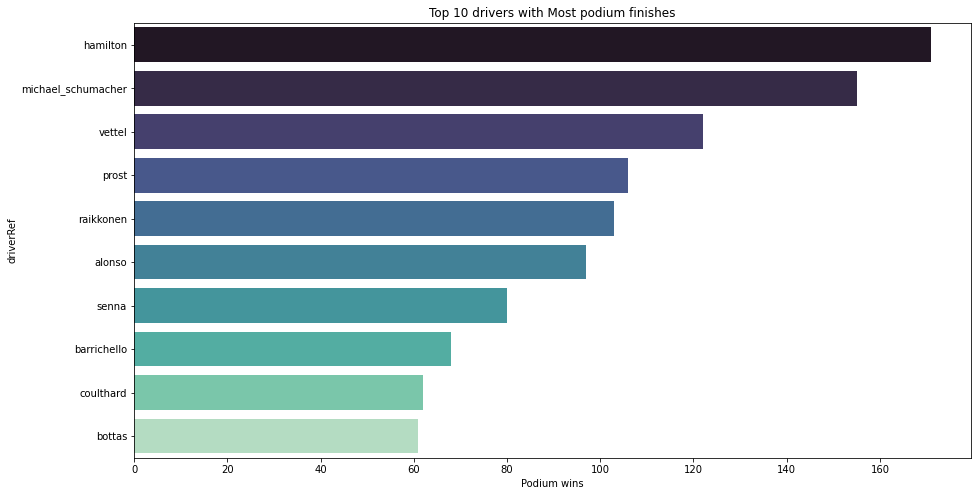

In [16]:
#Graphing a the top 10 drivers with the most podium finishes
plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_drivers,
            x='Podium wins',
            y=top_10_drivers.index,
            palette='mako').set_title('Top 10 drivers with Most podium finishes')

In [17]:
#zeroing in on only Hamilton and the races finishes he has had throught his career
hamilton_podium_year = final_f1_data.loc[(
    final_f1_data['driverRef'] == 'hamilton')]

In [18]:
hamilton_podium_year

,resultId,driverId,gridStart,podiumFinish,fastestLapTime,driverRef,code,surname,status,year,circuitName,constructorName
0,1,1,1,1,1:27.452,hamilton,HAM,Hamilton,Finished,2008,Australian Grand Prix,McLaren
2,27,1,9,5,1:35.462,hamilton,HAM,Hamilton,Finished,2008,Malaysian Grand Prix,McLaren
4,69,1,5,3,1:22.017,hamilton,HAM,Hamilton,Finished,2008,Spanish Grand Prix,McLaren
6,90,1,3,2,1:26.529,hamilton,HAM,Hamilton,Finished,2008,Turkish Grand Prix,McLaren
8,109,1,3,1,1:18.510,hamilton,HAM,Hamilton,Finished,2008,Monaco Grand Prix,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...
9071,22793,1,5,18,1:52.505,hamilton,HAM,Hamilton,Throttle,2015,Singapore Grand Prix,Mercedes
9073,23264,1,1,18,1:38.595,hamilton,HAM,Hamilton,Engine,2016,Malaysian Grand Prix,Mercedes
9084,23025,1,1,21,NaN,hamilton,HAM,Hamilton,Collision,2016,Spanish Grand Prix,Mercedes
9087,23730,1,3,9,1:19.945,hamilton,HAM,Hamilton,+1 Lap,2017,Mexican Grand Prix,Mercedes


Text(0.5, 1.0, 'Lewis Hamiltons Races throughout Career')

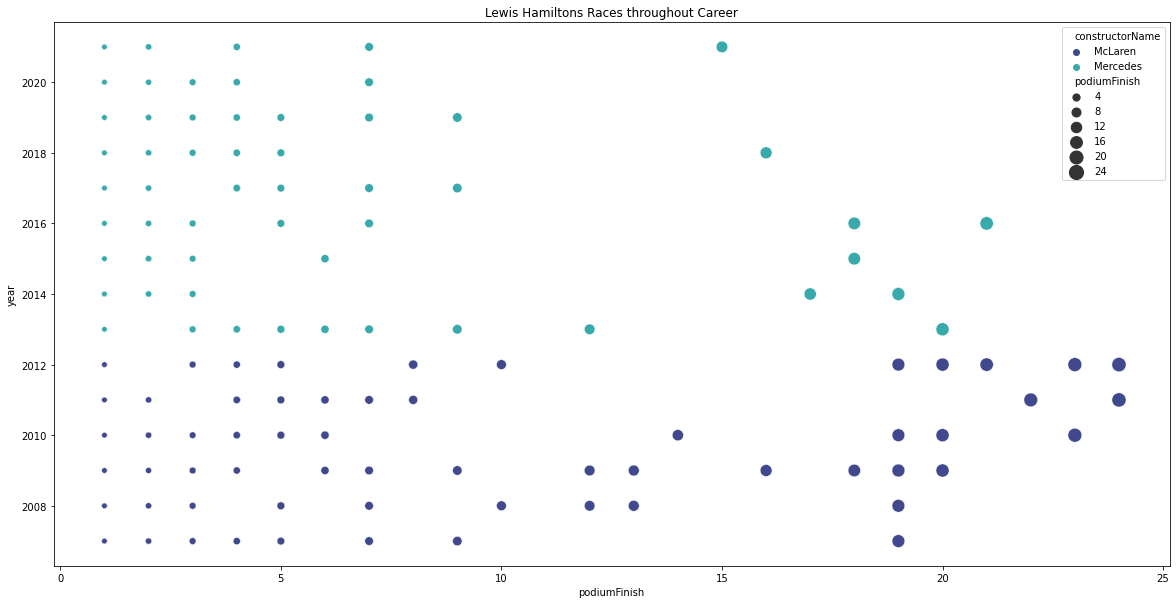

In [19]:
#using scatterplot to graph hamilton's races
plt.figure(figsize=(20, 10))
sns.scatterplot(data=hamilton_podium_year,
                y='year',
                x='podiumFinish',
                size='podiumFinish',
                hue='constructorName',
                sizes=(30, 200),
                palette='mako').set_title('Lewis Hamiltons Races throughout Career')

In [20]:
#Keeping on the top 10 Constructors and counting how many have podium wins they have 
top_10_constructors = podium_finish.groupby(
    'constructorName').size().sort_values(ascending=False).to_frame().head(10)

In [21]:
top_10_constructors.columns = ['Podium wins']

In [22]:
top_10_constructors 

,Podium wins
constructorName,
Ferrari,786
McLaren,475
Williams,313
Mercedes,247
Red Bull,193
Team Lotus,114
Renault,103
Benetton,102
Brabham,78


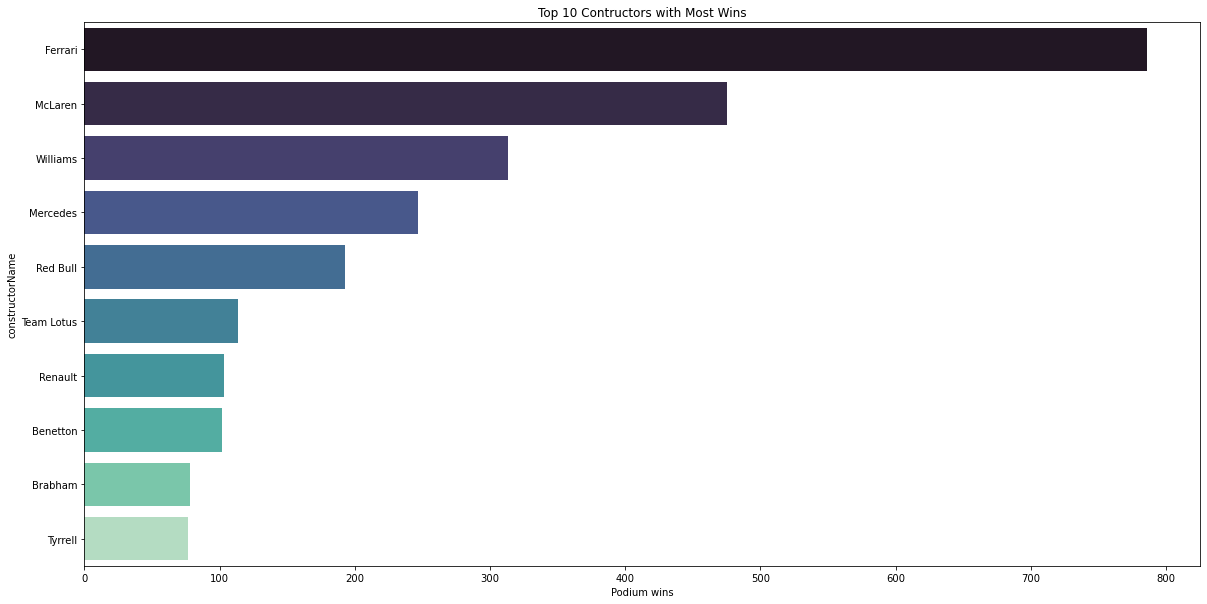

In [23]:
#Graphing a the top 10 Constructors with the most podium finishes
plt.figure(figsize=(20, 10))
s = sns.barplot(data=top_10_constructors,
                x='Podium wins',
                y=top_10_constructors.index,
                palette='mako').set_title('Top 10 Contructors with Most Wins')


## Question: Does Qualifying at a 1, 2, 3 position on the start grid guarantee you a Podium finish win at the end of the race?

I this section I will be answer the question as to whether during qualifying which is a day before the race if you finish in the top 1 , 2 ,3 position which determines your where you start on the race day, will it gaurantee you a final podium finish which is also 1, 2, 3 at the end of the race.

### Refining data for race results 

In order to see where a driver ended their race I have to create three seperate for loops to go through the dataset. Each for loop will only go through one start grid position each and then go through where they finish at the end of the race using a range for final position of 20. Once the for loop has gone through the entire data set it will save the count of how many drivers for each final position in a list

In [24]:
#creating list
first_grid = []

#Going through using a for loop final position of drivers from a grid 1 start, then saving it to a list
for i in range(1, 21):
    grid_start_1 = final_f1_data[(final_f1_data['gridStart'] == 1) &
                                 (final_f1_data['podiumFinish'] == i)].shape[0]
    first_grid.append(grid_start_1)

In [25]:
first_grid

[439,
 150,
 69,
 44,
 21,
 19,
 12,
 18,
 16,
 10,
 16,
 26,
 20,
 24,
 26,
 26,
 20,
 23,
 18,
 11]

In [26]:
#creating list
second_grid = []

#Going through using a for loop final position of drivers from a grid 2 start, then saving it to a list
for i in range(1, 21):
    grid_start_2 = final_f1_data[(final_f1_data['gridStart'] == 2) &
                                 (final_f1_data['podiumFinish'] == i)].shape[0]
    second_grid.append(grid_start_2)

In [27]:
second_grid

[251,
 205,
 111,
 56,
 40,
 16,
 32,
 17,
 19,
 10,
 22,
 18,
 20,
 20,
 20,
 37,
 24,
 21,
 19,
 24]

In [28]:
#creating list
third_grid = []

#Going through using a for loop final position of drivers from a grid 3 start, then saving it to a list
for i in range(1, 21):
    grid_start_3 = final_f1_data[(final_f1_data['gridStart'] == 3) &
                                 (final_f1_data['podiumFinish'] == i)].shape[0]
    third_grid.append(grid_start_3)

In [29]:
third_grid

[129,
 189,
 167,
 85,
 60,
 31,
 17,
 22,
 20,
 16,
 16,
 15,
 15,
 27,
 27,
 20,
 29,
 31,
 35,
 22]

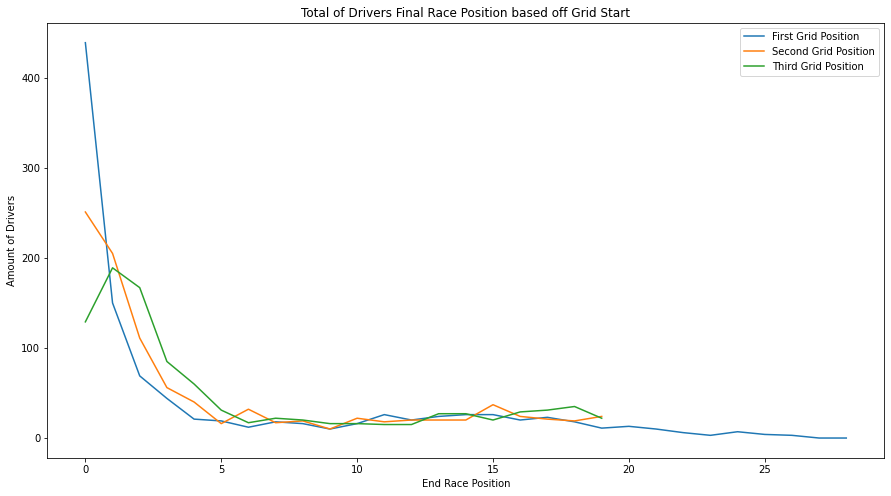

In [30]:
#setting the graph size
plt.figure(figsize=(15, 8))

#creating a data frame for the three different lists
Plot = pd.DataFrame({
    'First Grid Position': first_grid,
    'Second Grid Position': second_grid,
    'Third Grid Position': third_grid,
})

#plotting each list in a line graph
plt.plot([
    439, 150, 69, 44, 21, 19, 12, 18, 16, 10, 16, 26, 20, 24, 26, 26, 20, 23,
    18, 11, 13, 10, 6, 3, 7, 4, 3, 0, 0
])
plt.plot([
    251, 205, 111, 56, 40, 16, 32, 17, 19, 10, 22, 18, 20, 20, 20, 37, 24, 21,
    19, 24
])
plt.plot([
    129, 189, 167, 85, 60, 31, 17, 22, 20, 16, 16, 15, 15, 27, 27, 20, 29, 31,
    35, 22
])
plt.title('Total of Drivers Final Race Position based off Grid Start')
plt.xlabel('End Race Position')
plt.ylabel('Amount of Drivers')
plt.legend(Plot)
plt.show()

The graph above counts each final race position for a start posistion for a grid start of either 1 , 2 or 3. For example apporximate over 400 people have started the race at a grid position 1 as well as finishing the race on the podium at the 1 spot.

# Final Thoughts

Overall, looking at the data throughout the project I can say that there is a high chance that you will complete the race at on the podium. This is supports the reason as to why F1 teams focus heavily on qualifying as it allows you to control the tempo of the race. 